In [1]:
import os
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
twitter_users = ["nytimes", "BBCNews", "CBSNews", "CNN", "FoxNews"]
api = tweepy.API(auth)
tweets = []
for user in twitter_users:
    for tweet in tweepy.Cursor(api.user_timeline, user, tweet_mode='extended').items(100):
        tweets.append(tweet)
        time.sleep(3)
tweets


[Status(_api=<tweepy.api.API object at 0x11decc390>, _json={'created_at': 'Mon May 18 19:03:23 +0000 2020', 'id': 1262458780857651200, 'id_str': '1262458780857651200', 'full_text': '“What I have done daily since this whole calamity began cannot fairly be described as ‘running.’ Even ‘jogging’ is, in truth, a bit of a stretch,” @AlexandraJacobs writes. https://t.co/9IZECcBoRr', 'truncated': False, 'display_text_range': [0, 195], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AlexandraJacobs', 'name': 'Alexandra Jacobs', 'id': 353847680, 'id_str': '353847680', 'indices': [147, 163]}], 'urls': [{'url': 'https://t.co/9IZECcBoRr', 'expanded_url': 'https://nyti.ms/2ZfhG0T', 'display_url': 'nyti.ms/2ZfhG0T', 'indices': [172, 195]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1262458646216224768, 'in_reply_to_status_id_str': '1262458646216224768', 'in_reply_to_user_id': 807095, 'in_reply_to_user

In [6]:
#for tweet in tweets:
    #accounts = []
    #times = []
    #text = []
    #Account = tweets[0]._json["user"]['name']
    #Time = tweets[0]._json['created_at']
    #Tweet = tweets[0]._json['full_text']
    #accounts.append(Account)
    #times.append(Time)
    #text.append(Tweet)
#print(accounts)
#print(times)
#print(text)
accounts = []
times = []
text = []

for tweet in tweets:
    times.append(tweet.created_at)
    text.append(tweet.full_text)
    accounts.append(tweet.user.name)

In [7]:
tweets_df = pd.DataFrame({
    'Account': accounts,
    'Tweet Time': times,
    'Tweet Text': text   
    })

In [8]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
tweets_df

Account          Tweet Time  \
0    The New York Times 2020-05-18 19:03:23   
1    The New York Times 2020-05-18 19:02:51   
2    The New York Times 2020-05-18 19:02:03   
3    The New York Times 2020-05-18 19:01:20   
4    The New York Times 2020-05-18 19:00:06   
..                  ...                 ...   
495  Fox News           2020-05-08 01:53:04   
496  Fox News           2020-05-08 00:40:01   
497  Fox News           2020-05-07 23:18:37   
498  Fox News           2020-05-07 21:40:56   
499  Fox News           2020-05-07 20:16:49   

                                                                                                                                                                                              Tweet Text  
0    “What I have done daily since this whole calamity began cannot fairly be described as ‘running.’ Even ‘jogging’ is, in truth, a bit of a stretch,” @AlexandraJacobs writes. https://t.co/9IZECcBoRr  
1    Sarah Miller knows she has to get used to hearing, "How can you hate 'The Princess Bride'?" Her answer? "Bit by bit."  https://t.co/64ViXlhY7Z                                                       
2    “I can’t tell you which text it was that compelled me to Google the words ‘how to take a butt selfie,’ but I do not regret it,” writes Aminatou Sow. https://t.co/0mGWTg9PtR                         
3    “Now no one has plans anymore. It is irresponsible to have them. Plans are done; they’re extinct. There is no choice,” @taffyakner writes. https://t.co/2qfmdWoNoW                                   
4    These are far from joyful times, but editors for @NYTStyles thought we could use a little relief. That is why they asked writers to share what is bringing them joy now. https://t.co/l4qOFAr2qY     
..                                                                                                                                                                                                ...     
495  https://t.co/KR6L0uiuch                                                                                                                                                                              
496  https://t.co/2T9vlE3XWF                                                                                                                                                                              
497  https://t.co/LzDAUFj3sJ                                                                                                                                                                              
498  https://t.co/wu9UbAeohW                                                                                                                                                                              
499  https://t.co/YhdUMFGgnv                                                                                                                                                                              

[500 rows x 3 columns]

In [9]:
compound_sentiment = []
positive_sentiment = []
neutral_sentiment = []
negative_sentiment = []

for text in tweets_df["Tweet Text"]:
    target_string = text
    results = analyzer.polarity_scores(target_string)
    results

    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    compound_sentiment.append(compound)
    positive_sentiment.append(pos)
    neutral_sentiment.append(neu)
    negative_sentiment.append(neg)

In [10]:
print(compound_sentiment)
print(positive_sentiment)
print(neutral_sentiment)
print(negative_sentiment)

[0.3182, -0.6199, 0.4763, -0.743, 0.9344, 0.0, -0.891, 0.6625, 0.2023, 0.4215, -0.6908, -0.7906, 0.0, -0.6369, -0.2764, 0.296, 0.4767, 0.128, -0.5267, 0.6124, -0.128, 0.3612, 0.0, 0.0527, 0.9287, 0.25, -0.8225, -0.296, 0.9032, 0.4019, 0.0, -0.4215, 0.5574, 0.4767, -0.296, 0.6908, 0.6597, 0.5106, 0.2263, -0.7003, 0.5267, 0.3384, -0.5984, 0.0, -0.9598, 0.0, 0.1531, -0.4019, 0.25, 0.4588, 0.4215, 0.5574, -0.1531, -0.4019, 0.0, 0.0772, 0.4767, -0.6428, 0.0, 0.0, 0.0, 0.8553, -0.5574, -0.7845, 0.2263, 0.4767, -0.5106, 0.0, -0.128, -0.4215, 0.2023, -0.2732, 0.0, -0.0258, -0.5574, 0.34, -0.3417, -0.2742, 0.0, 0.0258, 0.0, 0.7906, -0.0516, -0.5719, 0.0, 0.0, -0.4215, 0.4939, 0.3612, 0.3612, -0.101, 0.5719, 0.296, -0.3749, 0.0, 0.4019, 0.1779, 0.3612, -0.4588, 0.0772, 0.4404, 0.0, -0.4614, -0.6908, 0.4019, 0.0, 0.0, 0.2023, -0.2732, -0.3182, 0.0, 0.8481, -0.3182, 0.1027, -0.3818, 0.0, 0.4404, -0.4576, -0.3182, 0.8442, -0.2732, 0.6705, 0.0, 0.4588, 0.1531, 0.0, 0.25, -0.6249, 0.3612, -0.3612, 0.

In [11]:
tweets_df["Compound Sentiment"] = compound_sentiment
tweets_df["Positive Sentiment"] = positive_sentiment
tweets_df["Neutral Sentiment"] = neutral_sentiment
tweets_df["Negative Sentiment"] = negative_sentiment

In [12]:
tweets_df

Account          Tweet Time  \
0    The New York Times 2020-05-18 19:03:23   
1    The New York Times 2020-05-18 19:02:51   
2    The New York Times 2020-05-18 19:02:03   
3    The New York Times 2020-05-18 19:01:20   
4    The New York Times 2020-05-18 19:00:06   
..                  ...                 ...   
495  Fox News           2020-05-08 01:53:04   
496  Fox News           2020-05-08 00:40:01   
497  Fox News           2020-05-07 23:18:37   
498  Fox News           2020-05-07 21:40:56   
499  Fox News           2020-05-07 20:16:49   

                                                                                                                                                                                              Tweet Text  \
0    “What I have done daily since this whole calamity began cannot fairly be described as ‘running.’ Even ‘jogging’ is, in truth, a bit of a stretch,” @AlexandraJacobs writes. https://t.co/9IZECcBoRr   
1    Sarah Miller knows she has to get used to hearing, "How can you hate 'The Princess Bride'?" Her answer? "Bit by bit."  https://t.co/64ViXlhY7Z                                                        
2    “I can’t tell you which text it was that compelled me to Google the words ‘how to take a butt selfie,’ but I do not regret it,” writes Aminatou Sow. https://t.co/0mGWTg9PtR                          
3    “Now no one has plans anymore. It is irresponsible to have them. Plans are done; they’re extinct. There is no choice,” @taffyakner writes. https://t.co/2qfmdWoNoW                                    
4    These are far from joyful times, but editors for @NYTStyles thought we could use a little relief. That is why they asked writers to share what is bringing them joy now. https://t.co/l4qOFAr2qY      
..                                                                                                                                                                                                ...      
495  https://t.co/KR6L0uiuch                                                                                                                                                                               
496  https://t.co/2T9vlE3XWF                                                                                                                                                                               
497  https://t.co/LzDAUFj3sJ                                                                                                                                                                               
498  https://t.co/wu9UbAeohW                                                                                                                                                                               
499  https://t.co/YhdUMFGgnv                                                                                                                                                                               

     Compound Sentiment  Positive Sentiment  Neutral Sentiment  \
0    0.3182              0.076               0.924               
1   -0.6199              0.000               0.844               
2    0.4763              0.124               0.876               
3   -0.7430              0.000               0.742               
4    0.9344              0.336               0.664               
..      ...                ...                 ...               
495  0.0000              0.000               1.000               
496  0.0000              0.000               1.000               
497  0.0000              0.000               1.000               
498  0.0000              0.000               1.000               
499  0.0000              0.000               1.000               

     Negative Sentiment  
0    0.000               
1    0.156               
2    0.000               
3    0.258               
4    0.000               
..     ...               
495  0.000               
4

In [17]:
tweets_df.to_csv("Tweets_Sentiment.csv")

In [18]:
tweets_nyt = tweets_df.loc[tweets_df["Account"] == "The New York Times"]
tweets_bbc = tweets_df.loc[tweets_df["Account"] == "BBC News (UK)"]
tweets_cbs = tweets_df.loc[tweets_df["Account"] == "CBS News"]
tweets_cnn = tweets_df.loc[tweets_df["Account"] == "CNN"]
tweets_fox = tweets_df.loc[tweets_df["Account"] == "Fox News"]

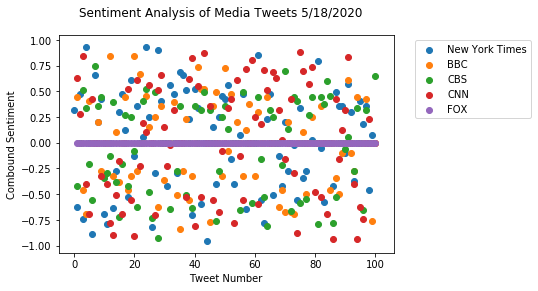

In [49]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.suptitle('Sentiment Analysis of Media Tweets 5/18/2020')

ax1.scatter(tweets_nyt.index,tweets_nyt["Compound Sentiment"])
ax1.scatter(tweets_bbc.index-99, tweets_bbc["Compound Sentiment"])
ax1.scatter(tweets_cbs.index-199, tweets_cbs["Compound Sentiment"])
ax1.scatter(tweets_cnn.index-299, tweets_cnn["Compound Sentiment"])
ax1.scatter(tweets_fox.index-399, tweets_fox["Compound Sentiment"])

labels = ["New York Times", "BBC", "CBS", "CNN", "FOX"]
ax1.set(xlabel='Tweet Number', ylabel='Combound Sentiment')
plt.legend(bbox_to_anchor=(1.05, 1), labels = labels)
plt.savefig("../Images/Sentiment_Analysis_Scatter", bbox_inches='tight')
plt.show()

In [21]:
tweets_group = tweets_df.groupby("Account").mean()["Compound Sentiment"]
tweets_group

Account
BBC News (UK)        -0.014422
CBS News             -0.029635
CNN                   0.009230
Fox News              0.000000
The New York Times    0.029752
Name: Compound Sentiment, dtype: float64

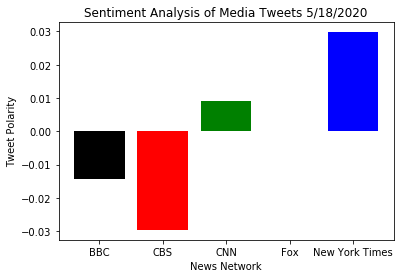

In [48]:
tweets_users_graph = ["BBC", "CBS", "CNN", "Fox", "New York Times"]
plt.bar(tweets_users_graph, tweets_group, color=['black', 'red', 'green', 'orange', 'blue'])
#for index, value in enumerate(tweets_group):
    #plt.text(value, index, str(round(value,2)))
plt.xlabel("News Network")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 5/18/2020")
plt.savefig("../Images/Sentiment_Analysis_Bar")